# CSE 6367 Programming Assignment 1 (P1)
## Summer 2023
## Due: 11:59pm Central Time, Friday, July 7, 2023

Note: For Task 1 - Task 4 of this programming assignment, you may use any libraries you want.

### Task 1 (25 points)

Import the "colors.png" image

<img src = "Images/colors.png" style="width:200px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)

b) Convert the image to grayscale using the formula, grayscale = (Red + Green + Blue / 3) and display the image.

c) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

d) Display the Text "Red" inside the Red part of the image, "Green" inside the Green part and "Blue" inside the green part of the image. Use a reasonable font size and display the texts ("Red, "Green", "Blue") in white color.

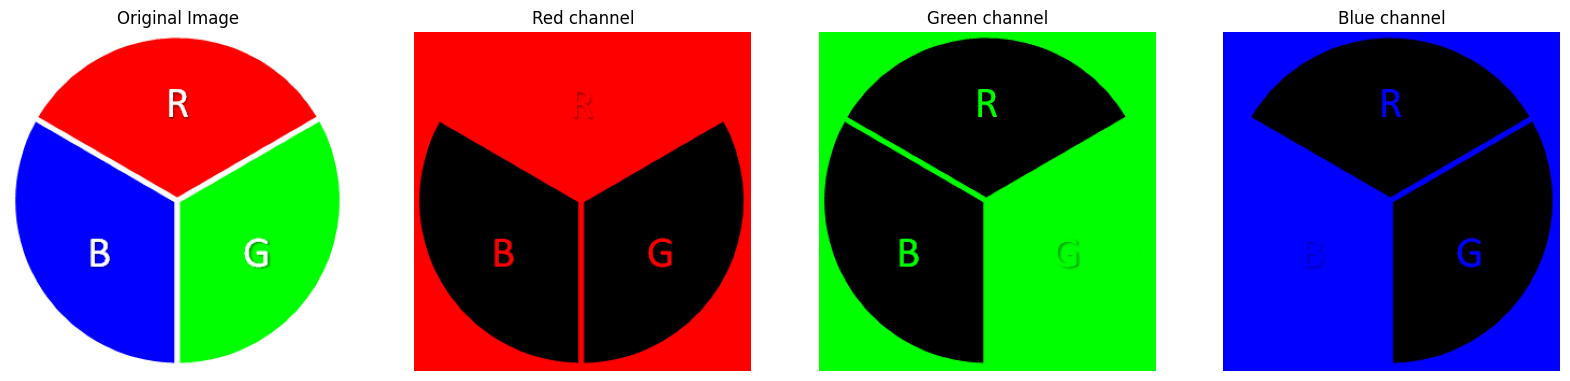

In [148]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./Images/colors.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

zeros = np.zeros_like(img)

red_img = np.stack([img[:,:,0], zeros[:,:,1], zeros[:,:,2]], axis=2)
green_img = np.stack([zeros[:,:,0], img[:,:,1], zeros[:,:,2]], axis=2)
blue_img = np.stack([zeros[:,:,0], zeros[:,:,1], img[:,:,2]], axis=2)

fig, ax = plt.subplots(1, 4, figsize=(20,5))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(red_img)
ax[1].set_title("Red channel")
ax[1].axis('off')

ax[2].imshow(green_img)
ax[2].set_title("Green channel")
ax[2].axis('off')

ax[3].imshow(blue_img)
ax[3].set_title("Blue channel")
ax[3].axis('off')

plt.show()


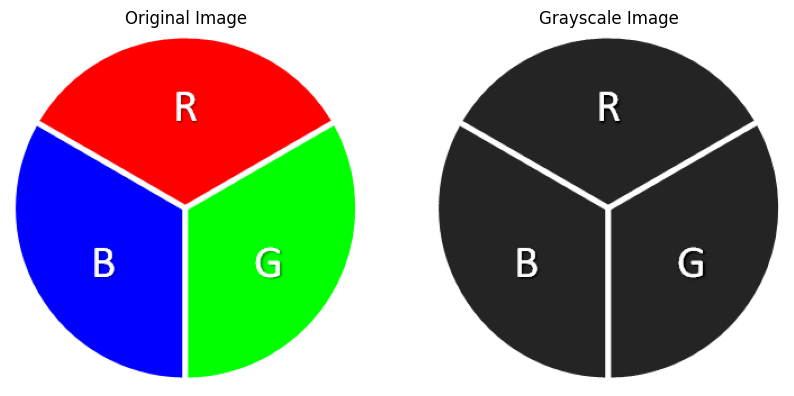

In [149]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./Images/colors.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


red, green, blue = cv2.split(image)

grayscale = img.mean(axis=2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()



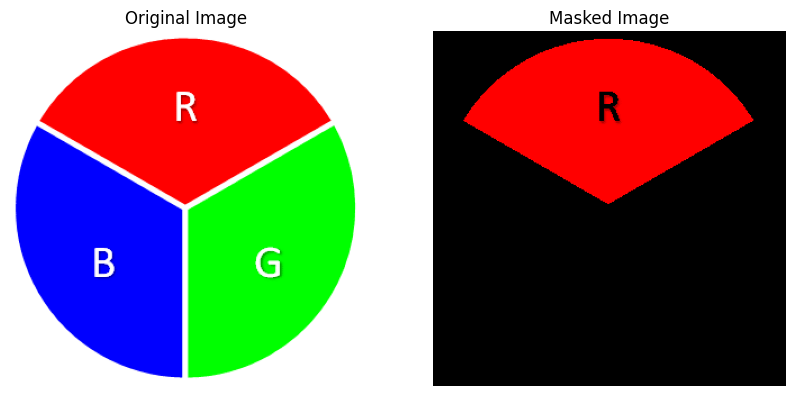

In [150]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('./Images/colors.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = ((image[:,:,0] >= 100) & (image[:,:,0] <= 255) &
        (image[:,:,1] >= 0) & (image[:,:,1] <= 50) &
        (image[:,:,2] >= 0) & (image[:,:,2] <= 50))

masked_image = np.zeros_like(image)
masked_image[mask] = image[mask]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(masked_image,cmap='gray')
ax[1].set_title('Masked Image')
ax[1].axis('off')

plt.show()


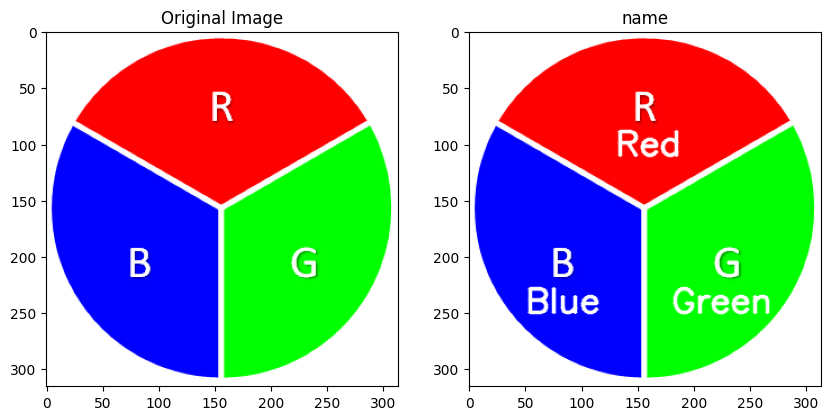

In [151]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./Images/colors.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(image)
ax[0].set_title("Original Image")

cv2.putText(image, 'Red', (130, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image, 'Green', (180, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image, 'Blue', (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

ax[1].imshow(image)
ax[1].set_title("name")


plt.show()


### Task 2 (25 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

b) Rotate the image by 60 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

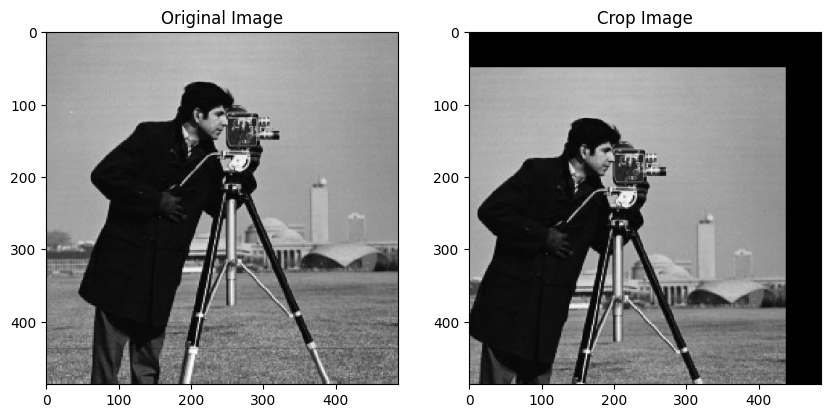

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Images/cameraman.jpeg')

M = np.float32([[1, 0, -50], [0, 1, 50]])

translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(translated_image)
ax[1].set_title("Crop Image")
plt.show()



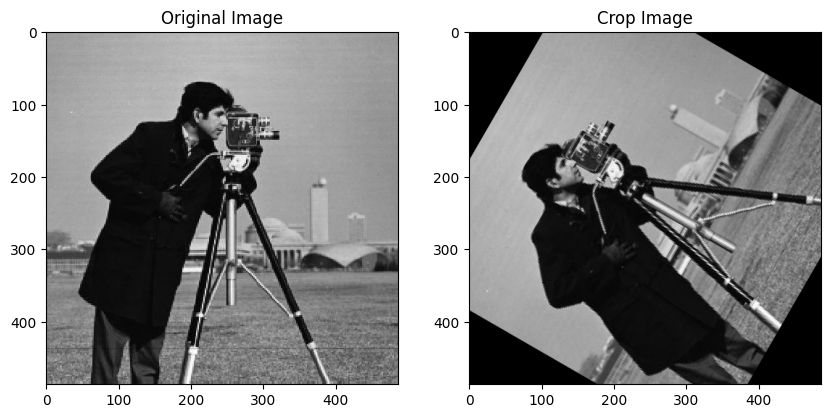

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Images/cameraman.jpeg')

rows, cols = image.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 1)

rotated_image = cv2.warpAffine(image, M, (cols, rows))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(rotated_image)
ax[1].set_title("Crop Image")
plt.show()



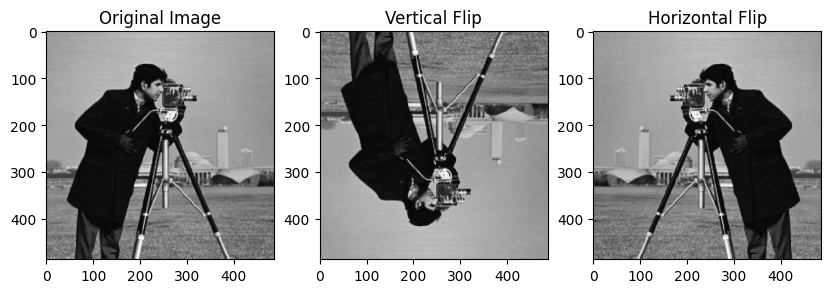

In [154]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Images/cameraman.jpeg')

rows, cols = image.shape[:2]

vertical_flip = cv2.flip(image, 0)

horizontal_flip = cv2.flip(image, 1)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(vertical_flip)
ax[1].set_title('Vertical Flip')

ax[2].imshow(horizontal_flip)
ax[2].set_title('Horizontal Flip')

plt.show()




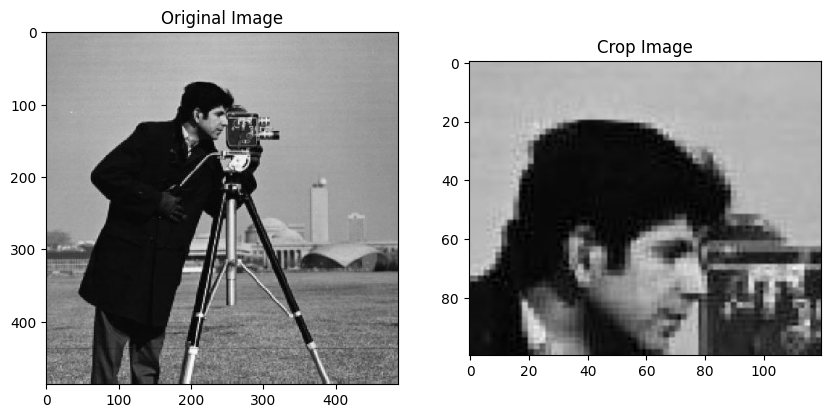

In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Images/cameraman.jpeg')


x = 170
y = 50
width = 120
height = 100

crop_head = image[y:y+height, x:x+width]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(crop_head)
ax[1].set_title("Crop Image")
plt.show()



### Task 3 (25 points)

Import the "cameraman.jpeg" image and

a) Perform average blur with kernel size 9X9 and 25X25.

b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

c) Perform median blur with kernel size 5X5 and 15X15.

d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels.

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered/processed images in a 1X3 grid.

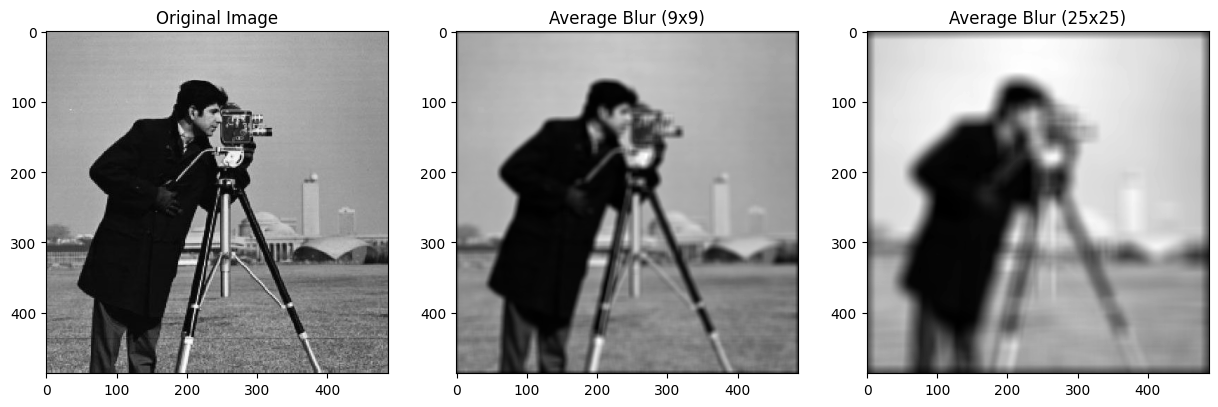

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve, gaussian_filter

image = cv2.imread('./Images/cameraman.jpeg')

kernel_9x9 = np.ones((9, 9), dtype=np.float32) / 81
kernel_25x25 = np.ones((25, 25), dtype=np.float32) / 625

blurred_9x9 = convolve(image, kernel_9x9, mode='constant', cval=0.0)
blurred_25x25 = convolve(image, kernel_25x25, mode='constant', cval=0.0)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(blurred_9x9, cmap='gray')
plt.title('Average Blur (9x9)')

plt.subplot(1,3,3)
plt.imshow(blurred_25x25, cmap='gray')
plt.title('Average Blur (25x25)')

plt.show()


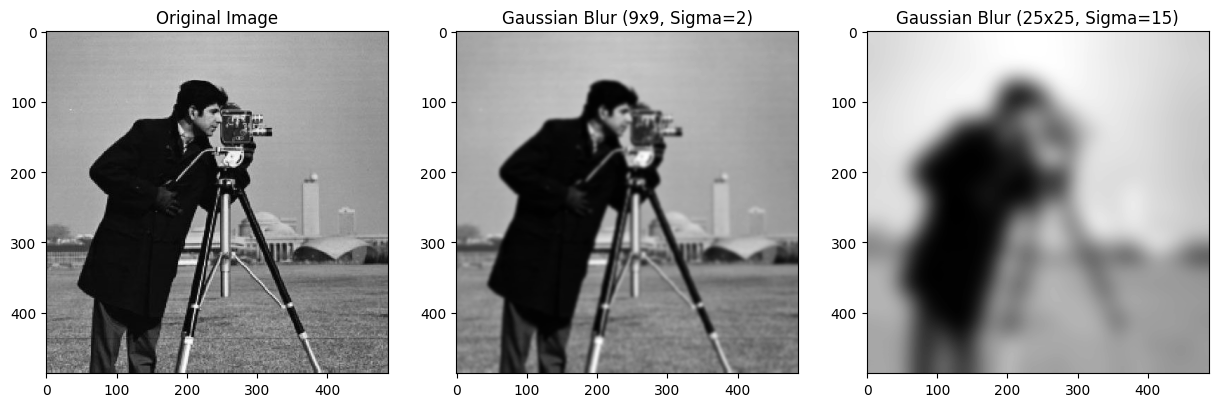

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve, gaussian_filter

image = cv2.imread('./Images/cameraman.jpeg')

blurred_gauss_9x9 = gaussian_filter(image, sigma=2, truncate=9/2)
blurred_gauss_25x25 = gaussian_filter(image, sigma=15, truncate=25/2)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(blurred_gauss_9x9, cmap='gray')
plt.title('Gaussian Blur (9x9, Sigma=2)')

plt.subplot(1,3,3)
plt.imshow(blurred_gauss_25x25, cmap='gray')
plt.title('Gaussian Blur (25x25, Sigma=15)')

plt.show()


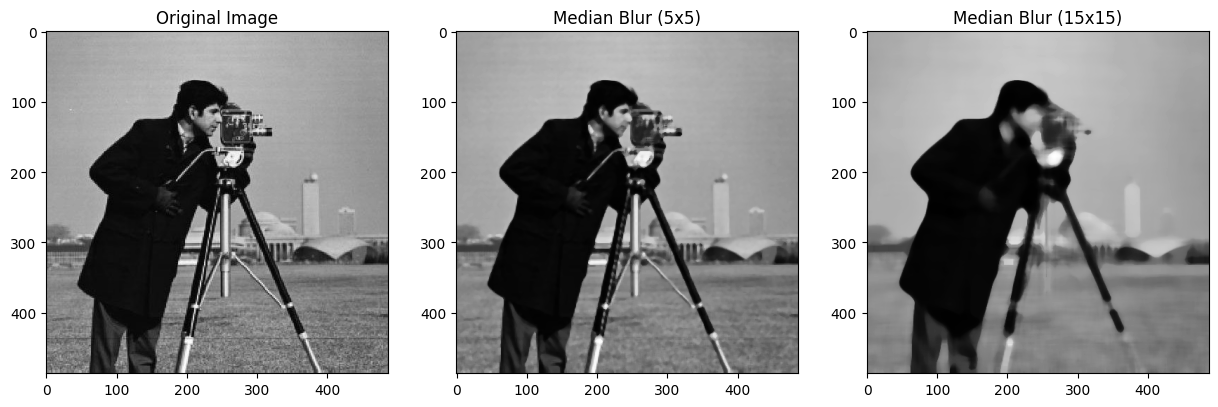

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve, gaussian_filter, median_filter

image = cv2.imread('./Images/cameraman.jpeg')

blurred_median_5x5 = median_filter(image, size=5)
blurred_median_15x15 = median_filter(image, size=15)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(blurred_median_5x5, cmap='gray')
plt.title('Median Blur (5x5)')

plt.subplot(1,3,3)
plt.imshow(blurred_median_15x15, cmap='gray')
plt.title('Median Blur (15x15)')

plt.show()


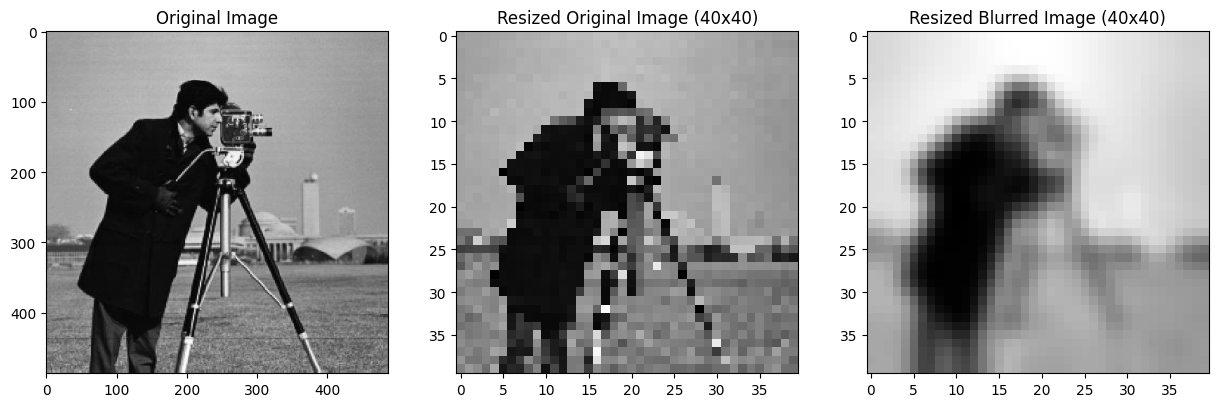

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve, gaussian_filter, median_filter, zoom

zoom_factor_orig = 40 / np.array(image.shape)
zoom_factor_blur = 40 / np.array(blurred_gauss_25x25.shape)

resized_image = zoom(image, zoom_factor_orig)
resized_blurred = zoom(blurred_gauss_25x25, zoom_factor_blur)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Original Image (40x40)')

plt.subplot(1,3,3)
plt.imshow(resized_blurred, cmap='gray')
plt.title('Resized Blurred Image (40x40)')

plt.show()


### Task 4 (25 points)

Import the "cameraman.jpeg" image and apply

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector

d) Canny edge detector
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot.

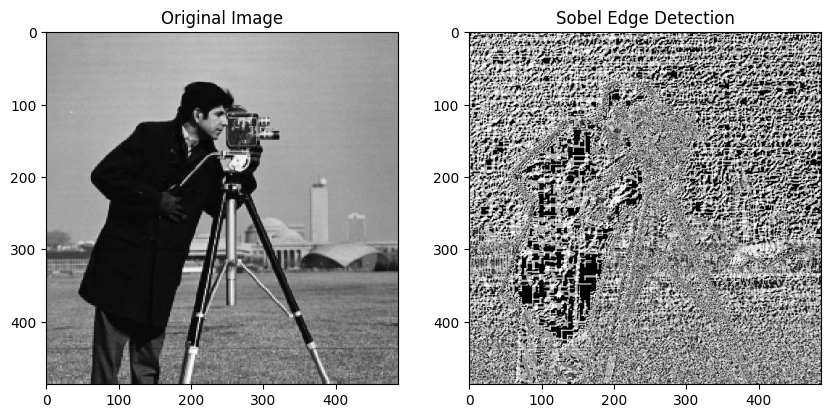

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve

image = cv2.imread('./Images/cameraman.jpeg')
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

edge_x = convolve(image, sobel_x, mode='constant', cval=0.0)
edge_y = convolve(image, sobel_y, mode='constant', cval=0.0)

sobel_image = np.hypot(edge_x, edge_y)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Edge Detection')

plt.show()


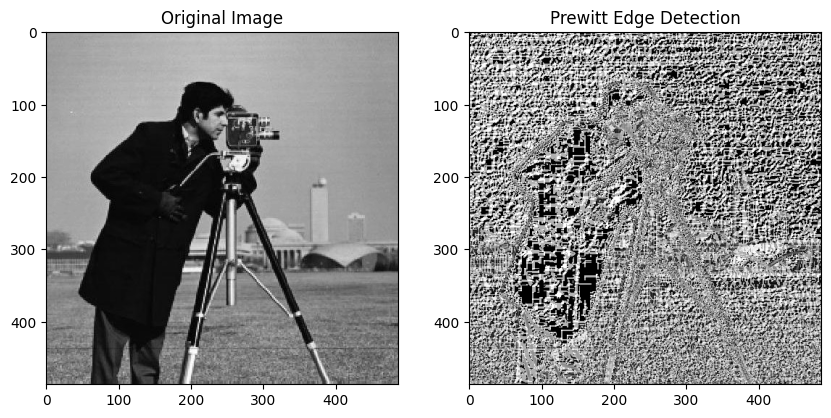

In [161]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

edge_x = convolve(image, prewitt_x, mode='constant', cval=0.0)
edge_y = convolve(image, prewitt_y, mode='constant', cval=0.0)

prewitt_image = np.hypot(edge_x, edge_y)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(prewitt_image, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.show()


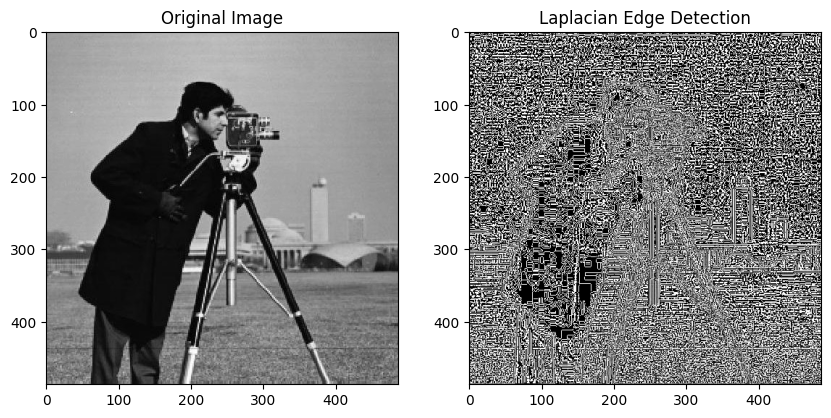

In [162]:
laplacian_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

laplacian_image = convolve(image, laplacian_filter, mode='constant', cval=0.0)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()


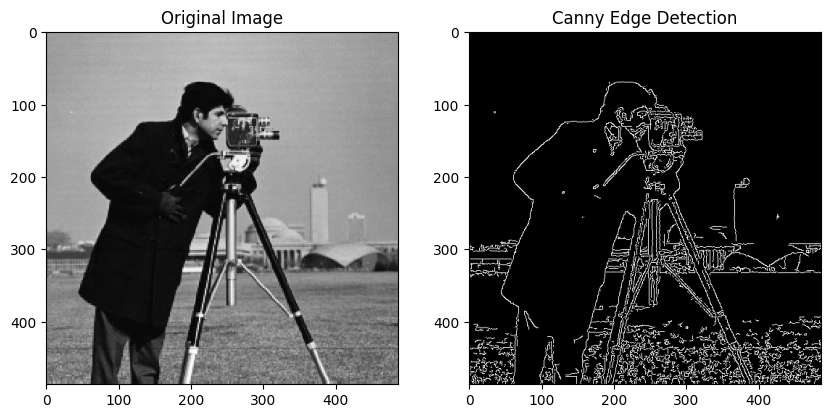

In [163]:
canny_edge = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()


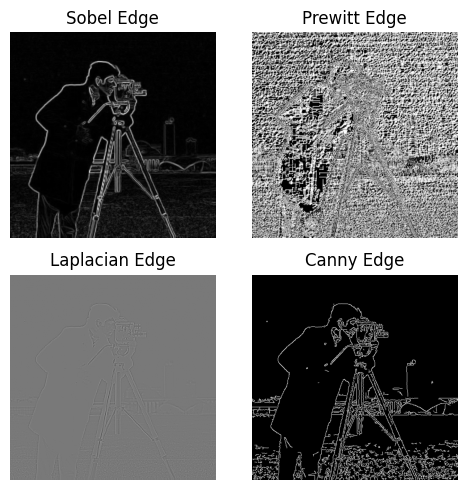

In [164]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

image = cv2.imread('./Images/cameraman.jpeg')

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edge = np.hypot(sobel_x, sobel_y)

prewitt_x = ndimage.prewitt(image, axis=0)
prewitt_y = ndimage.prewitt(image, axis=1)
prewitt_edge = np.hypot(prewitt_x, prewitt_y)

laplacian_edge = cv2.Laplacian(image, cv2.CV_64F)

canny_edge = cv2.Canny(image, 100, 200)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 0].imshow(sobel_edge, cmap='gray')
axs[0, 0].set_title('Sobel Edge')
axs[0, 0].axis('off')

axs[0, 1].imshow(prewitt_edge, cmap='gray')
axs[0, 1].set_title('Prewitt Edge')
axs[0, 1].axis('off')

axs[1, 0].imshow(laplacian_edge, cmap='gray')
axs[1, 0].set_title('Laplacian Edge')
axs[1, 0].axis('off')

axs[1, 1].imshow(canny_edge, cmap='gray')
axs[1, 1].set_title('Canny Edge')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


### Task 5 (optional - 20 points)

Implement "Canny Edge Detector" from scratch without using any library functions and compare your result with OpenCV implementation of "Canny Edge Detector"

In [165]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, maximum_filter
from ipywidgets import interact, fixed, FloatSlider

def gradient_intensity(im):
    gradients = np.gradient(im)
    grad_x, grad_y = gradients[0], gradients[1]
    grad_intensity = np.sqrt(grad_x**2 + grad_y**2)
    return grad_intensity

def canny(im, sigma, th_low=0.1, th_high=0.2):
    im_smoothed = gaussian_filter(im, sigma)
    grad_intensity = gradient_intensity(im_smoothed)
    non_max = maximum_filter(grad_intensity, size=5)
    boolean_mask = (grad_intensity == non_max)
    high_th_mask = grad_intensity > th_high
    low_th_mask = (grad_intensity > th_low) & (grad_intensity <= th_high)

    final_mask = high_th_mask.copy()
    current_pixels = list(zip(*high_th_mask.nonzero()))
    while len(current_pixels) > 0:
        new_pixels = []
        for y, x in current_pixels:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if (nx > 0 and nx < low_th_mask.shape[1] - 1 and
                        ny > 0 and ny < low_th_mask.shape[0] - 1 and
                        low_th_mask[ny, nx]):
                        low_th_mask[ny, nx] = False
                        final_mask[ny, nx] = True
                        new_pixels.append((ny, nx))
        current_pixels = new_pixels
    return final_mask

def load_image(path):
    im = cv2.imread(path)
    if len(im.shape) > 2 and im.shape[2] > 1:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im

def display_canny(path, sigma, th_low, th_high):
    im = load_image(path)
    canny_im = canny(im, sigma, th_low, th_high)

    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(im, cmap='gray')
    plt.title('Original Image')
    plt.subplot(132), plt.imshow(canny_im, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.subplot(133), plt.imshow(cv2.Canny(im, 100, 200), cmap='gray')
    plt.title('OpenCV implementation')
    plt.show()

# Interactive sliders
interact(display_canny,
         path=fixed('./Images/cameraman.jpeg'),
         sigma=FloatSlider(min=0.1, max=5, step=0.5, value=2.5),
         th_low=FloatSlider(min=0, max=5, step=0.5, value=2.5),
         th_high=FloatSlider(min=0, max=5, step=0.5, value=2.5))


interactive(children=(FloatSlider(value=2.5, description='sigma', max=5.0, min=0.1, step=0.5), FloatSlider(val…

<function __main__.display_canny(path, sigma, th_low, th_high)>

## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
